In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Assuming your dataset has columns: year, month, day, latitude, longitude, fatalities
# Replace the column names below if they are different in your dataset
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-nearest neighbors classification
k_values = [3, 5, 7]  # List of odd k values to try
accuracies = []

for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict fatalities for 2023 data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    
    print(f"For k={k}, Accuracy: {accuracy}")


For k=3, Accuracy: 0.8818681318681318
For k=5, Accuracy: 0.8791208791208791
For k=7, Accuracy: 0.8956043956043956


In [5]:
df.head()


,year,month,day,latitude,longitude,fatalities
0,2020,1,27,38.8137,-76.9453,1
1,2020,1,28,40.0444,-111.7320,0
2,2020,1,31,30.3674,-89.0928,1
3,2020,2,1,33.9375,-117.2310,1
4,2020,2,4,35.0887,-92.4421,1


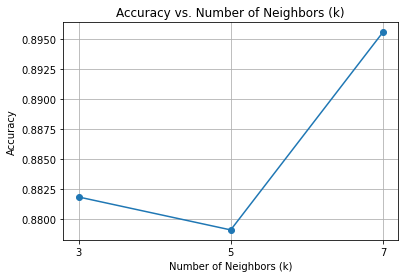

In [10]:
#Plotting
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

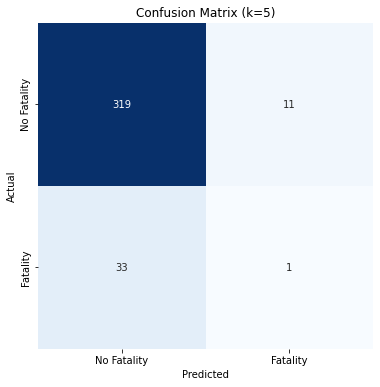

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# K-nearest neighbors classification
k = 5  # Choose the value of k for which you want to plot the confusion matrix
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Fatality', 'Fatality'], yticklabels=['No Fatality', 'Fatality'])
plt.title(f'Confusion Matrix (k={k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/home/supreethbmohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


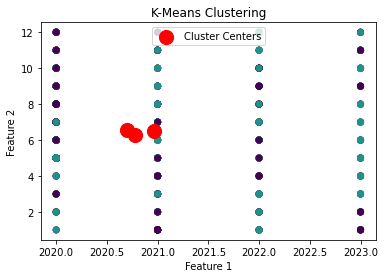

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X contains your data points

# Create KMeans object
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters (k) as required

# Fit KMeans clustering model to data
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=200, color='red', label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


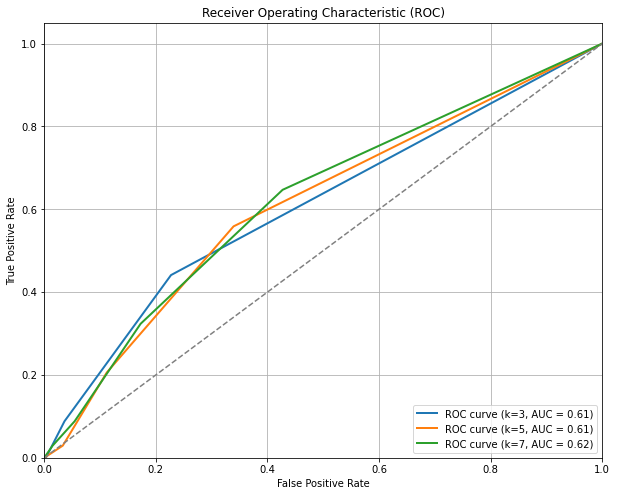

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List of odd k values to try
k_values = [3, 5, 7]  # Update this with the k values you want to try

# Create a larger figure
plt.figure(figsize=(10, 8))

for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict probabilities for positive class
    y_scores = knn.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='ROC curve (k=%d, AUC = %0.2f)' % (k, roc_auc))
   

# Plotting settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def euclidean_distance(point1, point2):
    # Compute Euclidean distance
    distance = np.sqrt(np.sum((point2 - point1)**2))
    return distance

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Split the dataset into features (X) and target (y)
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-nearest neighbors classification
k_values = [3, 5, 7]  # List of odd k values to try

for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict fatalities for 2023 data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"For k={k}, Accuracy: {accuracy}")

# Example usage of Euclidean distance function
point1 = X_test[0]  # Example coordinates for point 1
point2 = X_test[1]  # Example coordinates for point 2

distance = euclidean_distance(point1, point2)
print("Euclidean distance between the points:", distance)


For k=3, Accuracy: 0.8818681318681318
For k=5, Accuracy: 0.8791208791208791
For k=7, Accuracy: 0.8956043956043956
Euclidean distance between the points: 17.322356493560562


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Assuming you have your own dataset with features X and labels y
# Replace X and y with your actual dataset
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose your desired value of k

# Fit the classifier to your data
knn.fit(X_train, y_train)

# Plotting decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for actual points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


ValueError: X has 2 features, but KNeighborsClassifier is expecting 5 features as input.

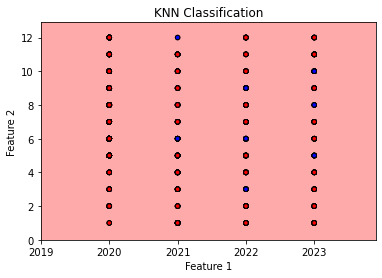

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Assuming you have your own dataset with features X and labels y
# Replace X and y with your actual dataset
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose your desired value of k

# Fit the classifier to your training data
knn.fit(X_train, y_train)

# Plotting decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for actual points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def euclidean_distance(point1, point2):
    # Compute Euclidean distance
    distance = np.sqrt(np.sum((point2 - point1)**2))
    return distance

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Split the dataset into features (X) and target (y)
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training (2020-2022) and testing (2023) sets
X_train = X[df['year'].between(2020, 2022)]
y_train = y[df['year'].between(2020, 2022)]
X_test = X[df['year'] == 2023]
y_test = y[df['year'] == 2023]

# Define KNN classifier with odd k value
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distance)

# Train the classifier on 2020-2022 data
knn.fit(X_train, y_train)

# Predict fatalities for 2023 data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on 2023 data:", accuracy)


Accuracy on 2023 data: 0.8387096774193549


Accuracy on 2023 data: 0.8387096774193549


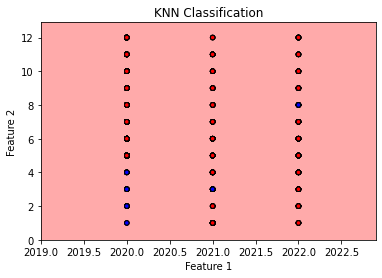

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def euclidean_distance(point1, point2):
    # Compute Euclidean distance
    distance = np.sqrt(np.sum((point2 - point1)**2))
    return distance

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Split the dataset into features (X) and target (y)
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training (2020-2022) and testing (2023) sets
X_train = X[df['year'].between(2020, 2022)]
y_train = y[df['year'].between(2020, 2022)]
X_test = X[df['year'] == 2023]
y_test = y[df['year'] == 2023]

# Define KNN classifier with odd k value and custom distance metric
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distance)

# Train the classifier on 2020-2022 data
knn.fit(X_train, y_train)

# Predict fatalities for 2023 data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on 2023 data:", accuracy)

# Plotting decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for actual points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



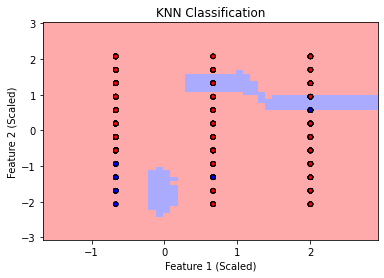

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define KNN classifier with odd k value and custom distance metric
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distance)

# Train the classifier on standardized 2020-2022 data
knn.fit(X_train_scaled, y_train)

# Plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for actual points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()


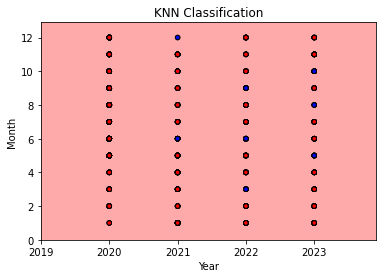

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"  # Update this with the path to your dataset file
df = pd.read_excel(dataset_path)

# Assuming you have your own dataset with features X and labels y
# Replace X and y with your actual dataset
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distance)  # You can choose your desired value of k

# Fit the classifier to your training data
knn.fit(X_train, y_train)

# Plotting decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1  # Assuming feature 1 is 'year'
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for actual points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.xlabel('Year')  # Update the x-axis label to 'Year'
plt.ylabel('Month')
plt.show()
